In [ ]:
import pandas as pd                      
import numpy as np                        
import tensorflow as tf                       
from keras.models import Sequential       


from keras.preprocessing import image            
from keras.preprocessing.image import ImageDataGenerator  

from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.optimizers import SGD, Adam         
from keras.utils import np_utils  

In [ ]:
print('Upload the CSV file')
#uploaded = files.upload()
emotion_data = pd.read_csv('sample_data/fer2013.csv')
print(emotion_data)

Upload the CSV file
      emotion                                             pixels     Usage
0           0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1           0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2           2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3           4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4           6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
...       ...                                                ...       ...
1869        3  149 133 120 128 131 127 108 110 111 108 138 17...  Training
1870        3  105 113 117 117 142 122 85 63 79 105 130 146 1...  Training
1871        6  129 140 141 138 35 46 52 57 51 51 55 58 58 58 ...  Training
1872        5  0 1 0 1 3 0 45 74 67 100 105 96 87 87 89 91 10...  Training
1873        2  4 3 7 9 13 19 27 48 33 37 28 15 14 16 20 21 20...       NaN

[1874 rows x 3 columns]


In [ ]:
X_train = []      
y_train = []      
X_test = []       
y_test = []       
for index, row in emotion_data.iterrows():    
    k = row['pixels'].split(" ")  
    try:
      if row['Usage'] == 'Training':    
          X_train.append(np.array(k,'float32')) 
          y_train.append(row['emotion'])
      elif row['Usage'] == 'PublicTest':
          X_test.append(np.array(k,'float32'))
          y_test.append(row['emotion'])
    except:
      print(f"error occured at index :{index} and row:{row}")


print(X_test)
print(type(X_test))


print(y_train)
print(type(y_train))

[]
<class 'list'>
[0, 0, 2, 4, 6, 2, 4, 3, 3, 2, 0, 6, 6, 6, 3, 5, 3, 2, 6, 4, 4, 2, 0, 0, 3, 3, 5, 0, 3, 5, 3, 6, 3, 2, 3, 6, 6, 6, 0, 5, 0, 3, 4, 0, 6, 2, 3, 6, 2, 2, 2, 5, 5, 6, 4, 5, 0, 3, 4, 2, 6, 5, 3, 4, 3, 0, 4, 3, 0, 5, 4, 2, 4, 2, 0, 6, 0, 0, 5, 4, 3, 5, 3, 6, 2, 2, 4, 4, 5, 4, 0, 0, 6, 0, 6, 2, 2, 3, 4, 3, 3, 2, 6, 3, 4, 3, 2, 0, 2, 3, 2, 3, 6, 6, 3, 4, 4, 0, 3, 3, 0, 2, 0, 0, 3, 3, 0, 4, 5, 2, 4, 2, 5, 3, 0, 6, 6, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 2, 2, 0, 0, 2, 6, 3, 4, 5, 3, 0, 2, 4, 5, 2, 3, 4, 6, 3, 4, 3, 6, 0, 4, 4, 4, 2, 6, 5, 5, 6, 5, 2, 3, 2, 3, 4, 0, 2, 0, 3, 0, 2, 2, 5, 3, 5, 5, 4, 3, 0, 6, 5, 2, 6, 0, 0, 4, 5, 6, 3, 5, 5, 3, 2, 2, 3, 3, 3, 3, 6, 3, 6, 3, 0, 6, 3, 2, 0, 6, 5, 6, 0, 5, 4, 3, 0, 3, 0, 4, 5, 4, 3, 3, 0, 0, 6, 2, 0, 6, 3, 0, 0, 6, 0, 5, 6, 3, 2, 5, 5, 2, 0, 2, 6, 6, 0, 2, 3, 4, 2, 6, 5, 2, 2, 6, 6, 6, 2, 5, 3, 0, 5, 0, 4, 3, 3, 3, 3, 6, 3, 2, 4, 6, 3, 2, 4, 0, 0, 3, 2, 0, 1, 2, 2, 5, 3, 5, 4, 4, 0, 2, 3, 4, 6, 4, 2, 2, 3, 5, 4, 4, 5, 6, 4, 5, 0, 3, 3, 3, 

In [ ]:
X_train = np.array(X_train, 'float32')
y_train = np.array(y_train, 'float32')
X_test = np.array(X_test,'float32')
y_test = np.array(y_test,'float32')

X_train -= np.mean(X_train, axis=0)  
X_train /= np.std(X_train, axis=0)  

X_test -= np.mean(X_test, axis=0)  
X_test /= np.std(X_test, axis=0) 

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)   
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

print(X_test.shape)
print(type(X_test))
print(X_train.shape)

y_train= np_utils.to_categorical(y_train, num_classes=7)
y_test = np_utils.to_categorical(y_test, num_classes=7)
print(y_train)
print(y_train.shape)
print(type(y_train))



(0, 48, 48, 1)
<class 'numpy.ndarray'>
(1873, 48, 48, 1)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
(1873, 7)
<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(X_train.shape[1:]),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
batch = 32
epoch = 30

history = model.fit(X_train,y_train,batch_size= batch,epochs= epoch,verbose=1,validation_data=(X_test, y_test),shuffle=True)


Epoch 1/30
59/59 [==============================] - 274s 5s/step - loss: 1.8629 - accuracy: 0.2120
Epoch 2/30
59/59 [==============================] - 248s 4s/step - loss: 1.8216 - accuracy: 0.2371
Epoch 3/30
59/59 [==============================] - 250s 4s/step - loss: 1.8291 - accuracy: 0.2435
Epoch 4/30
59/59 [==============================] - 248s 4s/step - loss: 1.8157 - accuracy: 0.2451
Epoch 5/30
59/59 [==============================] - 247s 4s/step - loss: 1.8097 - accuracy: 0.2445
Epoch 6/30
59/59 [==============================] - 247s 4s/step - loss: 1.8027 - accuracy: 0.2445
Epoch 7/30
59/59 [==============================] - 247s 4s/step - loss: 1.7883 - accuracy: 0.2520
Epoch 8/30
59/59 [==============================] - 246s 4s/step - loss: 1.7120 - accuracy: 0.2985
Epoch 9/30
59/59 [==============================] - 245s 4s/step - loss: 1.6458 - accuracy: 0.3289
Epoch 10/30
59/59 [==============================] - 244s 4s/step - loss: 1.5914 - accuracy: 0.3593
Epoch 11/

1/1 [==============================] - 0s 65ms/step


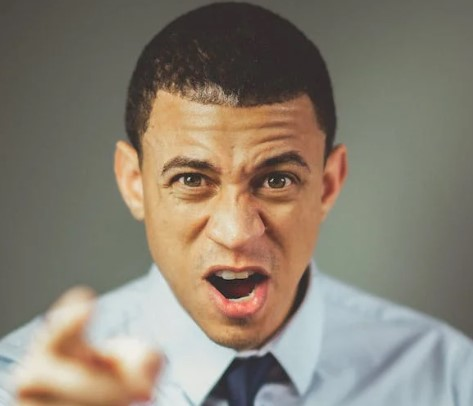



0 = angry
1/1 [==============================] - 0s 59ms/step


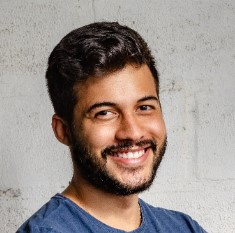



6 = neutral
1/1 [==============================] - 0s 67ms/step


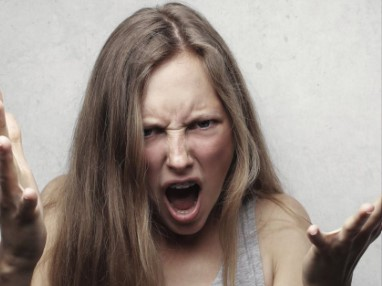



2 = fear
1/1 [==============================] - 0s 73ms/step


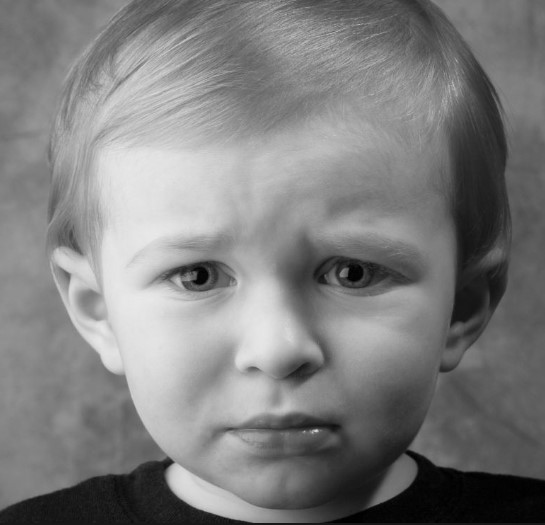



4 = sad
1/1 [==============================] - 0s 64ms/step


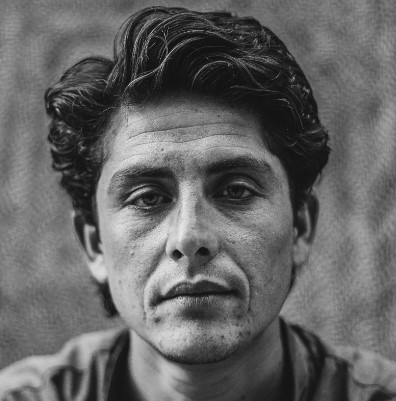



0 = angry


In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
TYELLOW = '\033[0;43m'

for i in range (2,7):
  img_directory = str(i) + '.jpg'
  img_data = tf.keras.utils.load_img(img_directory, target_size = (48, 48))  
  img_data = tf.keras.utils.img_to_array(img_data)                           
  img_data = tf.image.rgb_to_grayscale(img_data)

  img_data = np.expand_dims(img_data, axis = 0)                 

  classify = model.predict(img_data)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  max_index = np.argmax(classify[0])
  emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  emotion_prediction = emotion_detection[max_index]  
  
  if(max_index == 3 or max_index == 5):
    print(TGREEN + str(max_index) + ' = ' +  emotion_prediction)
  elif(max_index == 4 or max_index == 2 or max_index == 0):
    print(TRED + str(max_index) + ' = ' +  emotion_prediction)
  else:
    print(TYELLOW + str(max_index) + ' = ' +  emotion_prediction)